# Week 12: Part 1 - Clustering Models

**DATA110**
*Brian Roepke*

Unsupervised Learning: Clustering wine origin given chemical makeup

1. Perform general EDA 

1. Perform clustering analysis using:  

    - K-Means and 

    - Hierarchical Agglomerative clustering 

    - Apply techniques for identifying the best number of clusters (eg: elbow method and dendogram)

    - Create models and show a scatter plot with cluster assignments.

    - Evaluate performance metrics from sklearn.metrics: 

        - homogeneity_score,

        - completeness_score,

        - adjusted_rand_score, 

        - silhouette_score.

Note: because these are unsupervised, ML, algorithms, you need to exclude the class label during modeling. You also need to normalize/scale your features. 

Refer to the following as well as conduct your own research.

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
1. https://scikit-learn.org/stable/modules/clustering.html
1. https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [1]:
import numpy as np
import pandas as pd
from time import time
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Ash Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.shape

(178, 14)

In [5]:
# check for nan/null
df.isnull().values.any()

False

In [6]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Ash Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print("Before =", len_before)
# drop duplicates
print("After =", len_after)
print('')
print("Total Removed =", len_before - len_after)

Before = 178
After = 178

Total Removed = 0


# EDA

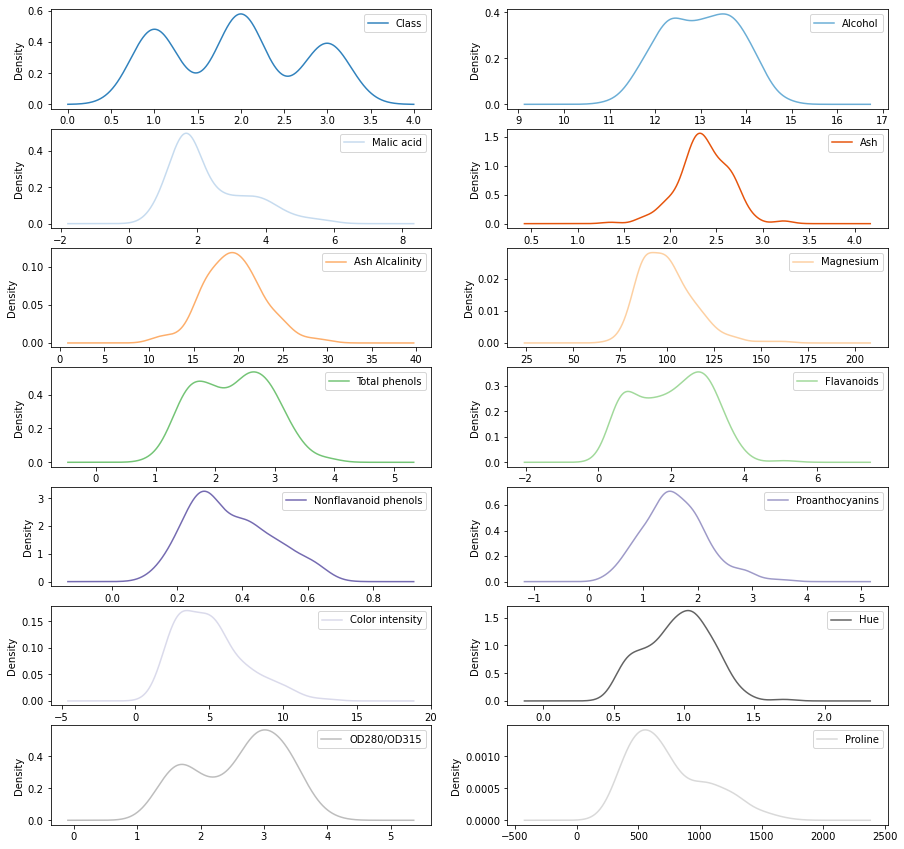

In [9]:
df.plot(figsize=(15,15), kind='kde', subplots=True, layout=(7,2), 
        sharex=False, sharey=False, cmap='tab20c');

**Observations:**

Each of the density plots are **approimatley normal**.  Many of them are bi-modal having two differnt peaks in the data.  This is a very uniform dataset.

In [10]:
# Function to print the number of outliers in a column.
def get_outliers(df):
    '''Function to identify the number of outliers +/- 3 standard deviations outside of mean.
    Pass this function a dataframe and it returns a dictionary'''
    
    outs = {}
    
    for col in df.columns:
        
        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        
        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]
        
        outs[col] = len(outliers)
        
    return outs

In [11]:
get_outliers(df)

{'Class': 0,
 'Alcohol': 0,
 'Malic acid': 1,
 'Ash': 3,
 'Ash Alcalinity': 1,
 'Magnesium': 2,
 'Total phenols': 0,
 'Flavanoids': 1,
 'Nonflavanoid phenols': 0,
 'Proanthocyanins': 1,
 'Color intensity': 1,
 'Hue': 1,
 'OD280/OD315': 0,
 'Proline': 0}

**Notes:**

There are only a very small number of outliers (outside of `+/-3` standard deviations.  No action will be taken to remove them.

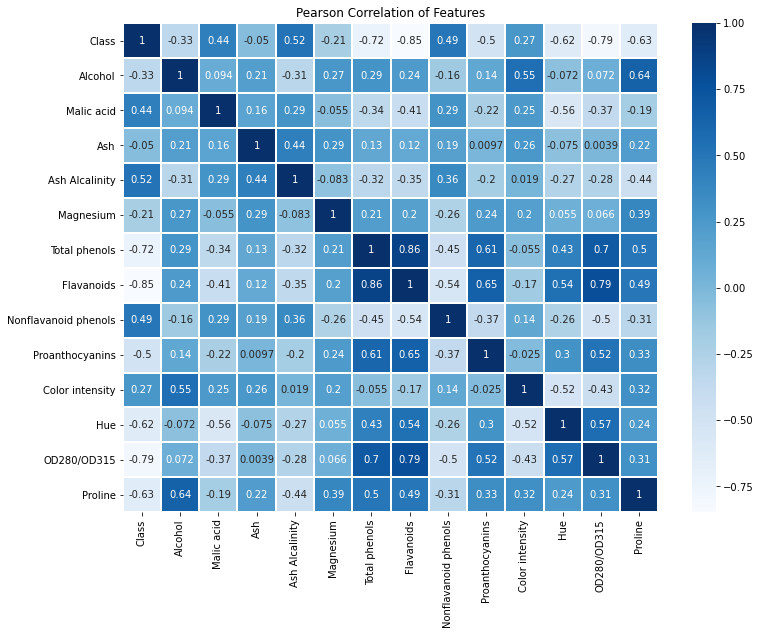

In [12]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=0);

### Data Setup

 - create a `labels` variable from the `Class`
 - drop the `Class` from the dataset and create a new variable called `data` with that.
 - Use the `MinMaxScaler` from sklearn to normalize the data.


In [13]:
labels = df['Class'].copy()
data = df.drop(columns=['Class']).copy()

In [14]:
mms = MinMaxScaler()
mms.fit(data)
data = mms.transform(data)
# Show five rows of the rescaled data
data[:1]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094]])

# Determine the Optimal Number of Clusters

## Elbow Method

To select the best number of clusters, we'll use the Elbow method.  Per [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

> *In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.*

[Tutorial: How to determine the optimal number of clusters for k-means clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [15]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

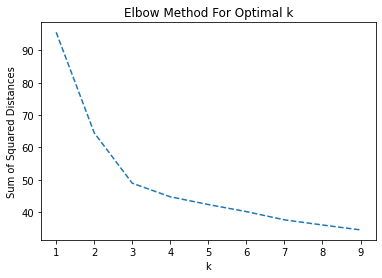

In [16]:
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
ax.lines[0].set_linestyle("--")
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Conclusion:** Based on this method, the appropriate number of clusters is `3`. The elbow is observed by the line's flattening representing the sum of square distances between cluster centers. 

Of course, this is something we already knew from the dataset since it was labeled with species. However, this nicely demonstrates this method.

## Dendrogram

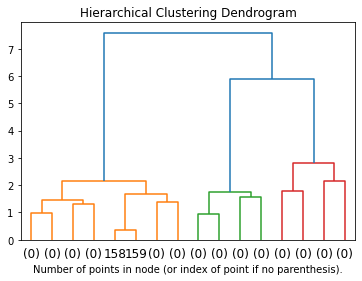

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: 
                current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float) 
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3, show_leaf_counts=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show();

## Set the Best k

In [18]:
k = 3

# Clustering

In [19]:
def bench_k_means(algo, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.
    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(algo).fit(data)
    fit_time = time() - t0
    results = [name, fit_time] #, estimator[-1].inertia_
    
    # Define the metrics which require only the true labels and estimator # labels
    clustering_metrics = [
            metrics.homogeneity_score,
            metrics.completeness_score,
            metrics.v_measure_score,
            metrics.adjusted_rand_score,
            metrics.adjusted_mutual_info_score,]
    
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
    
    # The silhouette score requires the full dataset
    results += [metrics.silhouette_score(data, estimator[-1].labels_, 
                                         metric="euclidean", sample_size=300,)]
    
    # Show the results
    # formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}" "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    formatter_result = ("{:9s}\t{:.3f}s\t{:.3f}\t{:.3f}" "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [20]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN

print(82 * '=') 
print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=k, n_init=5,random_state=0)
bench_k_means(algo=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=k, n_init=5, random_state=0)
bench_k_means(algo=kmeans, name="Random", data=data, labels=labels)

pca = PCA(n_components=k).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=k, n_init=5, random_state=0)
bench_k_means(algo=kmeans, name="PCA-based", data=data, labels=labels)

agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
bench_k_means(algo=agglo, name="Agglo", data=data, labels=labels)

sc = SpectralClustering(n_clusters=k)
bench_k_means(algo=sc, name="Spectral", data=data, labels=labels)

aff = AffinityPropagation()
bench_k_means(algo=aff, name="Affinity", data=data, labels=labels)

dbscan = DBSCAN(min_samples=10, eps=.5)
bench_k_means(algo=dbscan, name="DBSCAN", data=data, labels=labels)

print(82 * '=')

init		time	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.010s	0.846	0.837	0.842	0.854	0.840	0.301
Random   	0.005s	0.820	0.811	0.815	0.837	0.814	0.299
PCA-based	0.002s	0.846	0.837	0.842	0.854	0.840	0.301
Agglo    	0.001s	0.909	0.908	0.909	0.931	0.908	0.295
Spectral 	0.024s	0.911	0.907	0.909	0.931	0.908	0.300
Affinity 	0.014s	0.872	0.377	0.526	0.269	0.504	0.112
DBSCAN   	0.002s	0.477	0.525	0.500	0.401	0.494	0.204


**Observations**:

1. Since we have actual labels to test against we can use `homegeneity`, `completeness` and then the harmonic mean of these two in the `v-measure` score.  Based on this, the best two performing were the `AgglomerativeClustering` and `SpectralClustering`.  `AMI` is a very similar score to v-measure but uses the geometric average, therefore the best performing clustering algorithms are the same here was well.
1. The `silhoutte` score does not use the actual labels but rather computes how compact a cluster is or if there is sufficient overlap.  a Negative score would mean a lot, and a score of `1` would mean perfectly seperable data.  According to this metric, the k-means++ and PCA-based k-means++ were the best.

**Legend**
 ```
 =========== ========================================================  
 Label        Full name  
 =========== ========================================================  
 homo         homogeneity score  
 compl        completeness score  
 v-meas       V measure  
 ARI          adjusted Rand index  
 AMI          adjusted mutual information  
 silhouette   silhouette coefficient  
 =========== ========================================================
 ```
 

**Metrics for Assessing Performance with Ground Truth**
 - **Homogeneity**:  All of its clusters contain only data points that are members of a single class where one is best and zero is worst.
 - **Completeness**:  All the data points that are members of a given class are elements of the same cluster.
 - **V-measure**:  The V-measure is the (harmonic) mean between Homogeneity and Completeness. (The arithmetic mean between the two is the NMI below).
 - **Rand Index**: Computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs assigned in the same or different clusters in the predicted and true clusterings.
 - **Normalized/Adjusted Mutual Information (AMI)**: The Mutual Information Score measures the similarity between two labels of the same data, ground truth, and predicted label.

**Metrics for Assessing Performance WITHOUT Ground Truth**
 - **Silhouette coefficient**: This metric doesn't require ground truth. However, these often don't work well in practice. The silhouette score computes a cluster's compactness, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn't allow for complex shapes. 
 

**Ground Truth**

> *The ground truth is what you measured for your target variable for the training and testing examples.  Nearly all the time you can safely treat this the same as the label.*

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
2. https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb
3. https://datascience.stackexchange.com/questions/17839/what-is-ground-truth

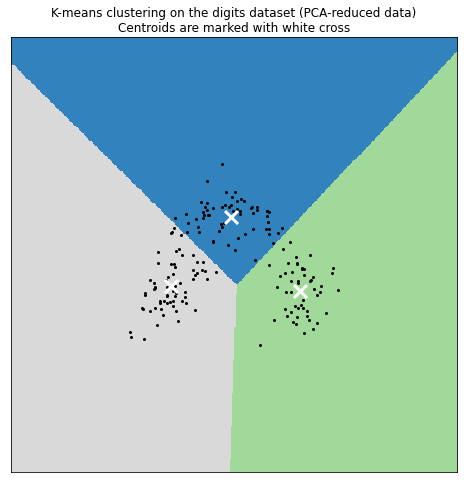

In [21]:
plt.figure(figsize=(8, 8))
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=k, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .01 # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.tab20c, aspect="auto", origin="lower")
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()